### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Vicky\anaconda31\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Vicky\anaconda31\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Users\Vicky\anaconda31\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
import itertools
import seaborn as sns
import pandas_profiling
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [3]:
from sklearn import datasets
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [4]:
train=pd.read_csv('NSL_Dataset/Train.txt',sep=',')
test=pd.read_csv('NSL_Dataset/Test.txt',sep=',')

In [5]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
columns=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land",
"wrong_fragment","urgent","hot","num_failed_logins","logged_in",
"num_compromised","root_shell","su_attempted","num_root","num_file_creations",
"num_shells","num_access_files","num_outbound_cmds","is_host_login",
"is_guest_login","count","srv_count","serror_rate", "srv_serror_rate",
"rerror_rate","srv_rerror_rate","same_srv_rate", "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate",
"dst_host_diff_srv_rate","dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
"dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [7]:
train.columns=columns
test.columns=columns

In [8]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [9]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22543 non-null  int64  
 1   protocol_type                22543 non-null  object 
 2   service                      22543 non-null  object 
 3   flag                         22543 non-null  object 
 4   src_bytes                    22543 non-null  int64  
 5   dst_bytes                    22543 non-null  int64  
 6   land                         22543 non-null  int64  
 7   wrong_fragment               22543 non-null  int64  
 8   urgent                       22543 non-null  int64  
 9   hot                          22543 non-null  int64  
 10  num_failed_logins            22543 non-null  int64  
 11  logged_in                    22543 non-null  int64  
 12  num_compromised              22543 non-null  int64  
 13  root_shell      

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.0,287.146929,2.604526e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125972.0,45567.100824,5.870354e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125972.0,19779.271433,4.021285e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125972.0,0.000198,1.408613e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.022688,2.535310e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.000111,1.436608e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.204411,2.149977e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125972.0,0.001222,4.523932e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.395739,4.890107e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125972.0,0.279253,2.394214e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [13]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,22543.0,218.868784,1407.207069,0.0,0.00,0.00,0.00,57715.0
src_bytes,22543.0,10395.911369,472796.912692,0.0,0.00,54.00,287.00,62825648.0
dst_bytes,22543.0,2056.110012,21219.763847,0.0,0.00,46.00,601.00,1345927.0
land,22543.0,0.000311,0.017619,0.0,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.008428,0.142602,0.0,0.00,0.00,0.00,3.0
urgent,22543.0,0.000710,0.036474,0.0,0.00,0.00,0.00,3.0
hot,22543.0,0.105399,0.928448,0.0,0.00,0.00,0.00,101.0
num_failed_logins,22543.0,0.021648,0.150331,0.0,0.00,0.00,0.00,4.0
logged_in,22543.0,0.442222,0.496661,0.0,0.00,0.00,1.00,1.0
num_compromised,22543.0,0.119904,7.269758,0.0,0.00,0.00,0.00,796.0


In [14]:
train['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [15]:
test['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
worm                  2
loadmodule            2
perl                  2
sqlattack             2
udpstorm              2
phf                   2
imap                  1
Name: attack, dtype: int64

####  Mutinomial Classification 

##### In attack_class normal means 0, DOS means 1, PROBE means 2, R2L means 3 and U2R means 4.

In [16]:
train.loc[train.attack=='normal','attack_class']=0

train.loc[(train.attack=='back') | (train.attack=='land') | (train.attack=='pod') | (train.attack=='neptune') | 
         (train.attack=='smurf') | (train.attack=='teardrop') | (train.attack=='apache2') | (train.attack=='udpstorm') | 
         (train.attack=='processtable') | (train.attack=='worm') | (train.attack=='mailbomb'),'attack_class']=1

train.loc[(train.attack=='satan') | (train.attack=='ipsweep') | (train.attack=='nmap') | (train.attack=='portsweep') | 
          (train.attack=='mscan') | (train.attack=='saint'),'attack_class']=2

train.loc[(train.attack=='guess_passwd') | (train.attack=='ftp_write') | (train.attack=='imap') | (train.attack=='phf') | 
          (train.attack=='multihop') | (train.attack=='warezmaster') | (train.attack=='warezclient') | (train.attack=='spy') | 
          (train.attack=='xlock') | (train.attack=='xsnoop') | (train.attack=='snmpguess') | (train.attack=='snmpgetattack') | 
          (train.attack=='httptunnel') | (train.attack=='sendmail') | (train.attack=='named'),'attack_class']=3

train.loc[(train.attack=='buffer_overflow') | (train.attack=='loadmodule') | (train.attack=='rootkit') | (train.attack=='perl') | 
          (train.attack=='sqlattack') | (train.attack=='xterm') | (train.attack=='ps'),'attack_class']=4

In [17]:
test.loc[test.attack=='normal','attack_class']=0

test.loc[(test.attack=='back') | (test.attack=='land') | (test.attack=='pod') | (test.attack=='neptune') | 
         (test.attack=='smurf') | (test.attack=='teardrop') | (test.attack=='apache2') | (test.attack=='udpstorm') | 
         (test.attack=='processtable') | (test.attack=='worm') | (test.attack=='mailbomb'),'attack_class']=1

test.loc[(test.attack=='satan') | (test.attack=='ipsweep') | (test.attack=='nmap') | (test.attack=='portsweep') | 
          (test.attack=='mscan') | (test.attack=='saint'),'attack_class']=2

test.loc[(test.attack=='guess_passwd') | (test.attack=='ftp_write') | (test.attack=='imap') | (test.attack=='phf') | 
          (test.attack=='multihop') | (test.attack=='warezmaster') | (test.attack=='warezclient') | (test.attack=='spy') | 
          (test.attack=='xlock') | (test.attack=='xsnoop') | (test.attack=='snmpguess') | (test.attack=='snmpgetattack') | 
          (test.attack=='httptunnel') | (test.attack=='sendmail') | (test.attack=='named'),'attack_class']=3

test.loc[(test.attack=='buffer_overflow') | (test.attack=='loadmodule') | (test.attack=='rootkit') | (test.attack=='perl') | 
          (test.attack=='sqlattack') | (test.attack=='xterm') | (test.attack=='ps'),'attack_class']=4

#### Binomial Classification

##### In attack_class normal means 0 and attack means 1.

In [18]:
train['attack_class']=np.where(train.attack=='normal',0,1)

In [19]:
train.attack_class.value_counts()

0    67342
1    58630
Name: attack_class, dtype: int64

In [20]:
test['attack_class']=np.where(test.attack=='normal',0,1)

In [21]:
test.attack_class.value_counts()

1    12832
0     9711
Name: attack_class, dtype: int64

In [22]:
train.shape

(125972, 44)

In [23]:
test.shape

(22543, 44)

In [24]:
train.attack_class.value_counts()

0    67342
1    58630
Name: attack_class, dtype: int64

In [ ]:
#output = pandas_profiling.ProfileReport(train)
# output

Summarize dataset:   0%|          | 0/57 [00:00<?, ?it/s]

### Exporting pandas profiling output to html file

In [ ]:
#output.to_file('pandas_profiling.html')

### Basic Exploratory Analysis 

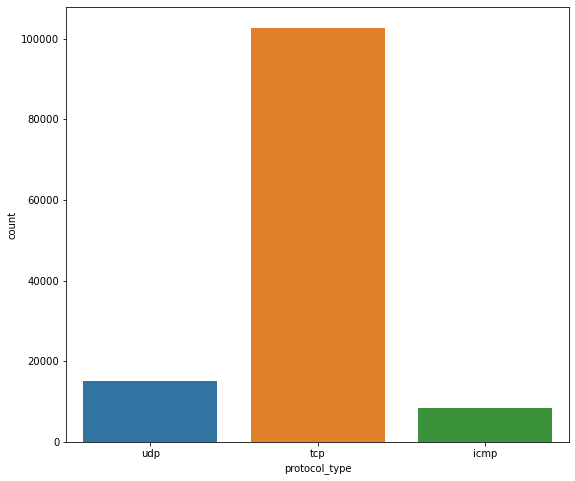

In [25]:
# Protocol type distribution
plt.figure(figsize=(9,8))
sns.countplot(x="protocol_type", data=train)
plt.show()

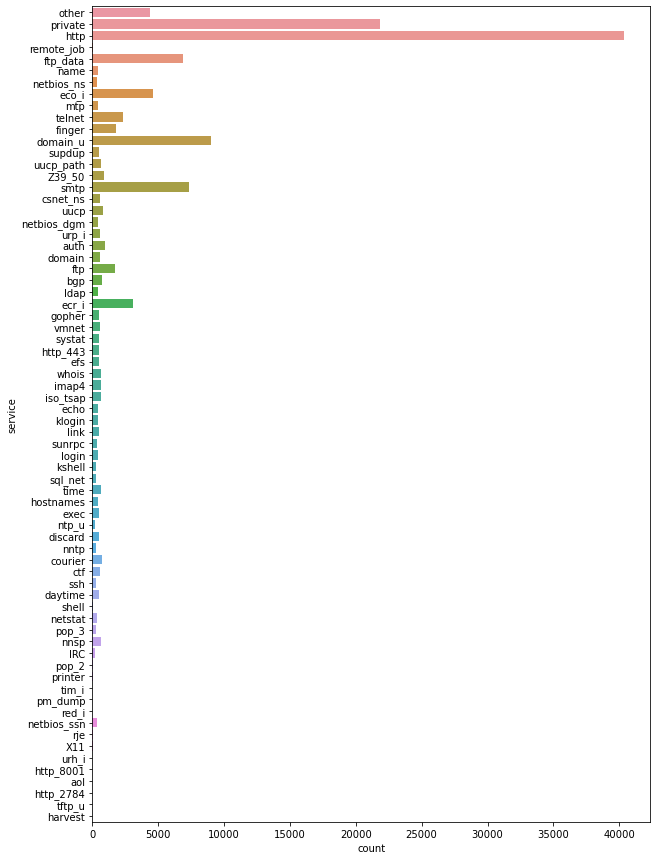

In [26]:
# Protocol type distribution
plt.figure(figsize=(10,15))
sns.countplot(y="service", data=train)
plt.show()

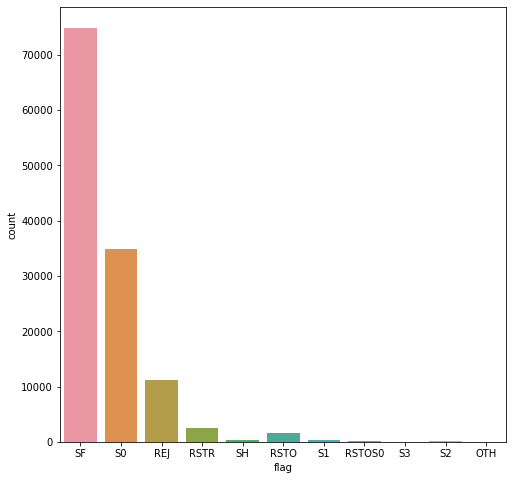

In [28]:
# Protocol type distribution
plt.figure(figsize=(8,8))
sns.countplot(x="flag", data=train)
plt.show()

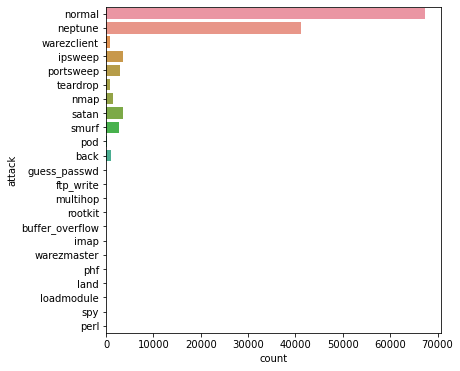

In [29]:
# Protocol type distribution
plt.figure(figsize=(6,6))
sns.countplot(y="attack", data=train)
plt.show()

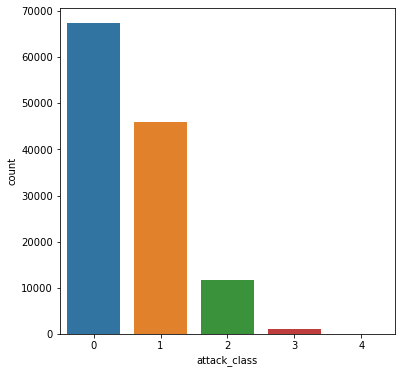

In [46]:
# Protocol type distribution
plt.figure(figsize=(6,6))
sns.countplot(x="attack_class", data=train)
plt.show()

C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


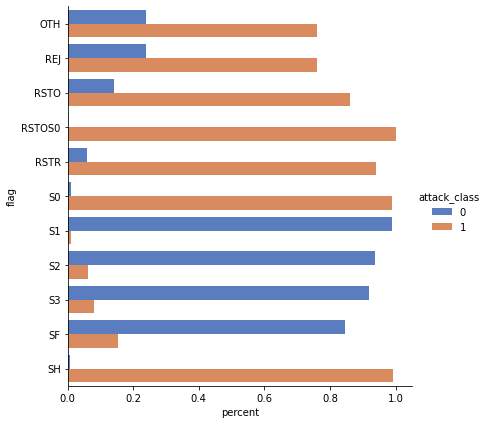

In [36]:
flag_count = train[['flag', 'attack_class']].groupby(['flag', 'attack_class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'attack_class', 'percent']
sns.factorplot(y="flag",
            x = 'percent',
            hue="attack_class",
            data = flag_count_percent,
            size=6,
            kind="bar",
            palette="muted")

C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Vicky\anaconda31\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


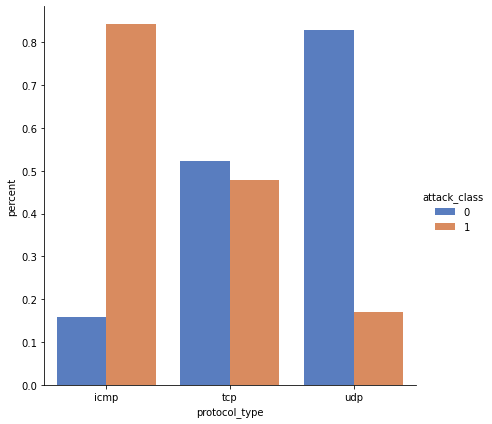

In [37]:
type_count = train[['protocol_type', 'attack_class']].groupby(['protocol_type', 'attack_class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'attack_class', 'percent']
sns.factorplot(x="protocol_type",
            y = 'percent',
            hue="attack_class",
            data = type_count_percent,
            size=6,
            kind="bar",
            palette="muted")

##### identifying relationships (between Y & numerical independent variables by comparing means)

In [47]:
train.groupby('attack_class').mean().T

attack_class,0,1,2,3,4
duration,168.589899,0.006227,2074.858185,633.417085,80.942308
src_bytes,13133.467064,1176.321162,385679.838367,307727.300503,906.230769
dst_bytes,4329.749517,169.201537,181074.911805,81822.026131,5141.961538
land,0.000104,0.000392,0.000000,0.000000,0.000000
wrong_fragment,0.000000,0.062229,0.000000,0.000000,0.000000
urgent,0.000148,0.000000,0.000000,0.003015,0.019231
hot,0.230658,0.039889,0.001630,8.334673,1.403846
num_failed_logins,0.001381,0.000000,0.000343,0.056281,0.019231
logged_in,0.710656,0.020837,0.007121,0.913568,0.884615
num_compromised,0.507083,0.019226,0.000601,0.077387,1.211538


##### Observations:

The length of time duration of connection for attack is higher than normal.

Wrong fragments in the connection is only present in attack.

Number of outbound commands in an ftp session are 0 in both normal and attack.

In [48]:
# Lets check corrleation between Variables
corrmat = train.corr()
corrmat

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.116006,0.254195,0.228737,-0.026670,-0.064949,-0.064361,0.173815,0.199023,-0.156310,0.129443
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592,0.012981
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076,0.008651
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038,0.002944
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.048734,0.059796,0.037177,-0.016252,-0.051917,-0.055918,0.028890,-0.033682,-0.157130,0.054795
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411,0.003941
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,-0.036294,-0.012293,-0.034536,-0.024715,-0.058223,-0.058215,-0.030555,-0.031670,-0.160013,0.065085
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178,0.023120
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.604056,-0.256067,-0.160994,-0.055955,-0.491484,-0.493270,-0.275974,-0.272809,0.269820,-0.576040
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101,-0.009003


### Data Audit
##### Seperate numerical and categorica variables 

In [49]:
tr_num_var=train.select_dtypes(['int64','float64','int32','float32'])
ts_num_var=test.select_dtypes(['int64','float64','int32','float32'])

In [50]:
tr_cat_var = train.select_dtypes('object')
ts_cat_var=test.select_dtypes('object')

In [54]:
tr_num_var.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,0
1,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,1
2,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,0
3,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,0
4,0,0,0,0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,1


In [55]:
ts_cat_var.head()

,protocol_type,service,flag,attack
0,tcp,private,REJ,neptune
1,tcp,ftp_data,SF,normal
2,icmp,eco_i,SF,saint
3,tcp,telnet,RSTO,mscan
4,tcp,http,SF,normal


In [57]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [58]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [59]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [61]:
tr_num_var.apply(continuous_var_summary).T.round(2)


,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,125972.0,0.0,3.617247e+07,287.15,0.00,2604.53,6.783553e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.00,9590.58,4.290800e+04
src_bytes,125972.0,0.0,5.740179e+09,45567.10,44.00,5870354.48,3.446106e+13,0.0,0.0,0.00,0.00,0.00,44.00,276.00,848.00,1480.00,54540.00,1.379964e+09
dst_bytes,125972.0,0.0,2.491634e+09,19779.27,0.00,4021285.11,1.617073e+13,0.0,0.0,0.00,0.00,0.00,0.00,516.00,3375.90,8314.00,25519.00,1.309937e+09
land,125972.0,0.0,2.500000e+01,0.00,0.00,0.01,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125972.0,0.0,2.858000e+03,0.02,0.00,0.25,6.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
urgent,125972.0,0.0,1.400000e+01,0.00,0.00,0.01,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.000000e+00
hot,125972.0,0.0,2.575000e+04,0.20,0.00,2.15,4.620000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,7.700000e+01
num_failed_logins,125972.0,0.0,1.540000e+02,0.00,0.00,0.05,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.000000e+00
logged_in,125972.0,0.0,4.985200e+04,0.40,0.00,0.49,2.400000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.000000e+00
num_compromised,125972.0,0.0,3.517800e+04,0.28,0.00,23.94,5.732300e+02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,7.479000e+03


In [63]:
ts_num_var.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.933959e+06,218.87,0.00,1407.21,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.58,57715.0
src_bytes,22543.0,0.0,2.343550e+08,10395.91,54.00,472796.91,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.00,62825648.0
dst_bytes,22543.0,0.0,4.635089e+07,2056.11,46.00,21219.76,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.76,1345927.0
land,22543.0,0.0,7.000000e+00,0.00,0.00,0.02,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.0,1.900000e+02,0.01,0.00,0.14,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
urgent,22543.0,0.0,1.600000e+01,0.00,0.00,0.04,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
hot,22543.0,0.0,2.376000e+03,0.11,0.00,0.93,8.600000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,101.0
num_failed_logins,22543.0,0.0,4.880000e+02,0.02,0.00,0.15,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.0
logged_in,22543.0,0.0,9.969000e+03,0.44,0.00,0.50,2.500000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.0
num_compromised,22543.0,0.0,2.703000e+03,0.12,0.00,7.27,5.285000e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,796.0


In [39]:
# alternate of .describe() for categorical variables
tr_cat_var.apply(categorical_var_summary).T
ts_cat_var.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
protocol_type,22543,0,tcp,18879,83.75
service,22543,0,http,7853,34.84
flag,22543,0,SF,14875,65.99
attack,22543,0,normal,9711,43.08


#### Outlier Treatment

In [40]:
#tr_num_var = tr_num_var.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))
#ts_num_var = tr_num_var.apply(lambda x: x.clip(lower = x.quantile(0.01), upper = x.quantile(0.99)))

In [41]:
tr_num_var.apply(continuous_var_summary).T.round(2)
ts_num_var.apply(continuous_var_summary).T.round(2)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
duration,22543.0,0.0,4.933959e+06,218.87,0.00,1407.21,1.980232e+06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,4.00,283.00,7589.58,57715.0
src_bytes,22543.0,0.0,2.343550e+08,10395.91,54.00,472796.91,2.235369e+11,0.0,0.0,0.00,0.00,0.00,54.00,287.00,1032.00,15876.00,283618.00,62825648.0
dst_bytes,22543.0,0.0,4.635089e+07,2056.11,46.00,21219.76,4.502784e+08,0.0,0.0,0.00,0.00,0.00,46.00,601.00,4099.40,8314.00,26032.76,1345927.0
land,22543.0,0.0,7.000000e+00,0.00,0.00,0.02,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0
wrong_fragment,22543.0,0.0,1.900000e+02,0.01,0.00,0.14,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
urgent,22543.0,0.0,1.600000e+01,0.00,0.00,0.04,0.000000e+00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0
hot,22543.0,0.0,2.376000e+03,0.11,0.00,0.93,8.600000e-01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,101.0
num_failed_logins,22543.0,0.0,4.880000e+02,0.02,0.00,0.15,2.000000e-02,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.0
logged_in,22543.0,0.0,9.969000e+03,0.44,0.00,0.50,2.500000e-01,0.0,0.0,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.0
num_compromised,22543.0,0.0,2.703000e+03,0.12,0.00,7.27,5.285000e+01,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,796.0


#### There is no missing values.Therefore no missing value treatment.

#### Dummy Variables

In [42]:
# get the useful categorical variables
tr_cat_var = train[['protocol_type', 'service','flag','attack']]

# for c_feature in categorical_features
for c_feature in ['protocol_type', 'service','flag','attack']:
    tr_cat_var[c_feature] = tr_cat_var[c_feature].astype('category')
    tr_cat_var = create_dummies(tr_cat_var, c_feature)

In [43]:
# get the useful categorical variables
ts_cat_var = test[['protocol_type', 'service','flag','attack']]

# for c_feature in categorical_features
for c_feature in ['protocol_type', 'service','flag','attack']:
    ts_cat_var[c_feature] = ts_cat_var[c_feature].astype('category')
    ts_cat_var = create_dummies(ts_cat_var, c_feature)

#### Final datasets

In [44]:
train_new= pd.concat([tr_num_var, tr_cat_var], axis = 1)
test_new = pd.concat([ts_num_var, ts_cat_var], axis = 1)

In [45]:
train_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
0,0,146,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,232,8153,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,199,420,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
test_new.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_snmpgetattack,attack_snmpguess,attack_sqlattack,attack_teardrop,attack_udpstorm,attack_warezmaster,attack_worm,attack_xlock,attack_xsnoop,attack_xterm
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,12983,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,20,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,267,14515,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
corrm=train_new.corr()
corrm

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,attack_phf,attack_pod,attack_portsweep,attack_rootkit,attack_satan,attack_smurf,attack_spy,attack_teardrop,attack_warezclient,attack_warezmaster
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064219,0.042679,...,-0.000612,-0.004407,0.471677,-0.000637,-0.018990,-0.016149,0.000047,-0.009310,0.013536,-0.001316
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.000044,-0.000300,0.039127,-0.000069,-0.001338,-0.001114,-0.000031,-0.000655,0.004288,-0.000098
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.000016,-0.000197,0.026878,-0.000034,-0.000847,-0.000720,-0.000018,-0.000415,-0.000398,0.012228
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.000079,-0.000563,-0.002174,-0.000126,-0.002428,-0.002064,-0.000056,-0.001190,-0.001188,-0.000178
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072419,-0.001044,...,-0.000504,0.151750,-0.013812,-0.000797,-0.015421,-0.013108,-0.000357,0.985733,-0.007548,-0.001128
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.000044,-0.000309,-0.001194,0.061953,-0.001333,-0.001133,-0.000031,-0.000653,-0.000653,-0.000097
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002013,...,0.004706,-0.003801,-0.014478,-0.000018,-0.016141,-0.013926,-0.000379,-0.008029,0.352671,0.004077
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.000152,-0.001080,-0.004171,0.019455,-0.000463,-0.003958,-0.000108,-0.002282,-0.002279,-0.000341
logged_in,-0.064219,-0.003353,-0.002894,-0.011402,-0.072419,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.006963,-0.032352,-0.124581,0.001900,-0.134123,-0.118539,0.000850,-0.068341,0.104233,-0.007621
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002013,0.019085,0.014413,1.000000,...,-0.000066,-0.000466,-0.001800,0.000380,-0.002004,-0.001708,-0.000046,-0.000985,-0.000984,-0.000147


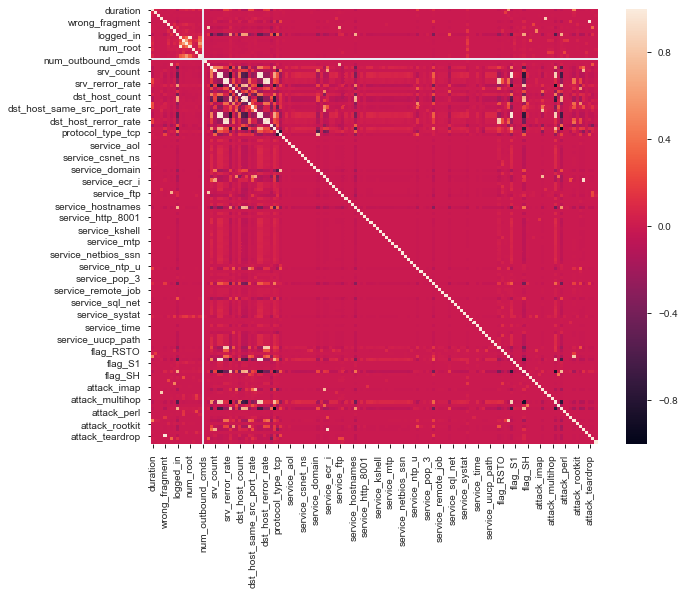

In [48]:
plt.figure(figsize = (10, 8))
sns.heatmap(corrm)

##### Dropping columns based on data audit report
    - Based on low variance (near zero variance)
    - High missings (>25% missings)
    - High correlations between two numerical variables


In [49]:
train_new.drop(columns=['land','wrong_fragment','urgent','num_failed_logins',"root_shell","su_attempted","num_root",
                        "num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login",
                        'dst_host_rerror_rate','dst_host_serror_rate','dst_host_srv_rerror_rate','dst_host_srv_serror_rate',
                        'num_root','num_outbound_cmds','srv_rerror_rate','srv_serror_rate'],inplace=True)

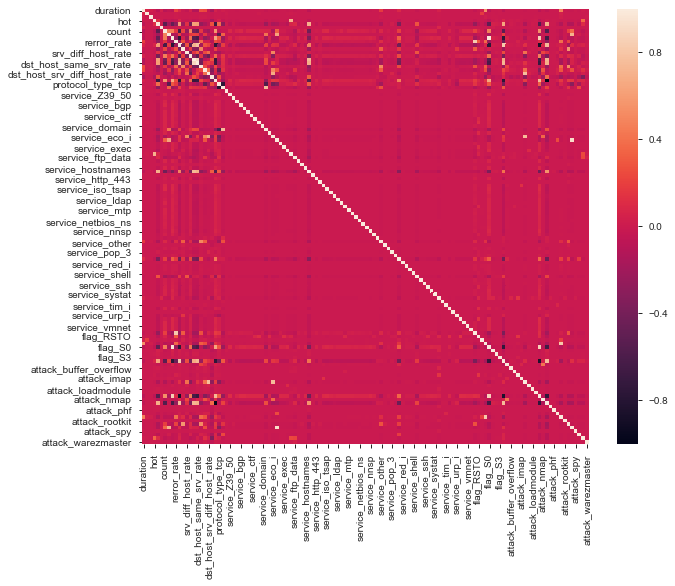

In [50]:
plt.figure(figsize = (10, 8))
sns.heatmap(train_new.corr())

#### Variable Reduction using Recursive Feature Elimination (RFE)

In [50]:
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
X = train_new[train_new.columns.difference(['attack_class'])]
logreg = LogisticRegression(solver='lbfgs',multi_class='auto')
rfe = RFE(logreg, 15)
rfe = rfe.fit(X, train_new['attack_class'] )
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True False False False  True False  True False
 False False  True False  True False False False False False False  True
 False False False  True False False False False False False False False
  True False False False False False False False  True False  True False
  True False  True False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False  True]
[ 82  95  74  91   1  86  93  94   1  18   1 102  98  36   1  90   1  24
 108  29  26  84   8   1  27   9   2   1  15  10  14   5  12  53  43  16
   1  44  92  85   3  34  22   6   1  25   1  11   1   4   1  76  41 105
  38  50  37  58  61  63  62  8

In [51]:
# capturing the important variables
RFE_features=X.columns[rfe.get_support()]
RFE_features

Index(['attack_ipsweep', 'attack_neptune', 'attack_normal', 'attack_portsweep',
       'attack_satan', 'diff_srv_rate', 'dst_host_same_src_port_rate',
       'flag_S0', 'logged_in', 'protocol_type_tcp', 'rerror_rate',
       'serror_rate', 'service_eco_i', 'service_private',
       'srv_diff_host_rate'],
      dtype='object')

In [52]:
all_columns = "+".join(train_new.columns.difference( ['attack_class'] ))

print (all_columns)

attack_buffer_overflow+attack_ftp_write+attack_guess_passwd+attack_imap+attack_ipsweep+attack_land+attack_loadmodule+attack_multihop+attack_neptune+attack_nmap+attack_normal+attack_perl+attack_phf+attack_pod+attack_portsweep+attack_rootkit+attack_satan+attack_smurf+attack_spy+attack_teardrop+attack_warezclient+attack_warezmaster+count+diff_srv_rate+dst_bytes+dst_host_count+dst_host_diff_srv_rate+dst_host_same_src_port_rate+dst_host_same_srv_rate+dst_host_srv_count+dst_host_srv_diff_host_rate+duration+flag_REJ+flag_RSTO+flag_RSTOS0+flag_RSTR+flag_S0+flag_S1+flag_S2+flag_S3+flag_SF+flag_SH+hot+last_flag+logged_in+num_compromised+protocol_type_tcp+protocol_type_udp+rerror_rate+same_srv_rate+serror_rate+service_X11+service_Z39_50+service_aol+service_auth+service_bgp+service_courier+service_csnet_ns+service_ctf+service_daytime+service_discard+service_domain+service_domain_u+service_echo+service_eco_i+service_ecr_i+service_efs+service_exec+service_finger+service_ftp+service_ftp_data+service_

#### Variance Inflation Factor assessment

In [61]:
# import the packages for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
# run the dmatrices
a, b = dmatrices(formula_like='''attack_class ~ count+diff_srv_rate+dst_bytes+dst_host_count+
                 dst_host_diff_srv_rate+dst_host_same_src_port_rate+
                 dst_host_srv_diff_host_rate+duration+
                 hot+last_flag+logged_in+num_compromised+
                srv_count+srv_diff_host_rate''', data =train_new, return_type = 'dataframe')

# get the VIF
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

,VIF Factor,features
0,158.148718,Intercept
1,2.305372,count
2,1.455500,diff_srv_rate
3,1.291247,dst_bytes
4,1.971129,dst_host_count
5,1.733521,dst_host_diff_srv_rate
6,1.891936,dst_host_same_src_port_rate
7,1.955657,dst_host_srv_diff_host_rate
8,1.298032,duration
9,1.310192,hot


#### Final Variables

In [52]:
cols=['count','diff_srv_rate','dst_bytes','dst_host_count',
                 'dst_host_diff_srv_rate','dst_host_same_src_port_rate',
                 'dst_host_srv_diff_host_rate','duration',
                 'hot','last_flag','logged_in','num_compromised',
                 'srv_count','srv_diff_host_rate']

### Model Building

In [53]:
train_X=train_new[cols]
train_y=train_new['attack_class']
test_X=test_new[cols]
test_y=test_new['attack_class']

### Logistic Regression

In [54]:
# Building Models
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
logreg.fit( train_X, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
logreg.predict(train_X)   #by default, it use cut-off as 0.5

array([0, 1, 0, ..., 0, 1, 0])

In [56]:
list( zip( cols, logreg.coef_[0] ) )

[('count', 0.025256141154098147),
 ('diff_srv_rate', 0.00023029504731905302),
 ('dst_bytes', 4.229057131495215e-08),
 ('dst_host_count', 0.001115414029324814),
 ('dst_host_diff_srv_rate', 0.0004530641130409861),
 ('dst_host_same_src_port_rate', 0.001286210989039165),
 ('dst_host_srv_diff_host_rate', 0.00038966224090641524),
 ('duration', 4.8698903362725695e-05),
 ('hot', 0.001258028170739243),
 ('last_flag', -0.050928554888666995),
 ('logged_in', -0.0038565655893138305),
 ('num_compromised', -0.004661432556819811),
 ('srv_count', -0.02274617921182445),
 ('srv_diff_host_rate', 0.0002876060898376622)]

In [57]:
logreg.intercept_

array([-0.00166381])

In [58]:
logreg.score(train_X,train_y)

0.8763534753754803

## Decision Trees

#### Fine Tuning the parameters

In [59]:
train_X.shape

(125972, 14)

In [60]:
param_grid = {'max_depth': np.arange(2, 12),
             'max_features': np.arange(10,15)}

In [61]:
train_y.shape

(125972,)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([10

In [64]:
tree.best_score_

0.9947131108500301

In [65]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=14, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
tree.best_params_

{'max_depth': 11, 'max_features': 14}

In [67]:
train_pred = tree.predict(train_X)

In [68]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     67342
           1       0.99      1.00      1.00     58630

    accuracy                           1.00    125972
   macro avg       1.00      1.00      1.00    125972
weighted avg       1.00      1.00      1.00    125972



In [69]:
test_pred = tree.predict(test_X)

In [70]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83      9711
           1       0.96      0.73      0.83     12832

    accuracy                           0.83     22543
   macro avg       0.85      0.85      0.83     22543
weighted avg       0.86      0.83      0.83     22543



#### Building Final Decision Tree Model

In [71]:
clf_tree = DecisionTreeClassifier( max_depth = 11, max_features=13)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=13, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Feature Importance

In [72]:
train_X.columns

Index(['count', 'diff_srv_rate', 'dst_bytes', 'dst_host_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'duration', 'hot', 'last_flag',
       'logged_in', 'num_compromised', 'srv_count', 'srv_diff_host_rate'],
      dtype='object')

In [73]:
clf_tree.feature_importances_

array([1.19180089e-01, 4.86691555e-03, 6.66931753e-01, 7.70453153e-03,
       1.93796712e-02, 3.08903345e-02, 3.21268615e-03, 2.78691279e-04,
       4.28558127e-03, 1.33368030e-01, 5.69310689e-03, 5.08867142e-05,
       3.01890122e-03, 1.13882162e-03])

In [74]:
list(zip(train_X.columns,clf_tree.feature_importances_ ))

[('count', 0.1191800890929641),
 ('diff_srv_rate', 0.004866915553550299),
 ('dst_bytes', 0.6669317532390596),
 ('dst_host_count', 0.007704531525661661),
 ('dst_host_diff_srv_rate', 0.019379671216539215),
 ('dst_host_same_src_port_rate', 0.03089033447282478),
 ('dst_host_srv_diff_host_rate', 0.00321268615381161),
 ('duration', 0.0002786912792897489),
 ('hot', 0.004285581270269232),
 ('last_flag', 0.1333680297483229),
 ('logged_in', 0.0056931068859082294),
 ('num_compromised', 5.0886714175767956e-05),
 ('srv_count', 0.0030189012248047144),
 ('srv_diff_host_rate', 0.001138821622818097)]

In [75]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [76]:
tree_test_pred.sample( n = 10 )

,actual,predicted
17645,1,0
8960,0,0
1659,1,0
20537,1,1
12838,0,0
9154,1,1
10973,0,0
21149,1,1
4868,0,1
16954,1,0


In [77]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8179479217495453

Text(0.5, 26.0, 'Predicted label')

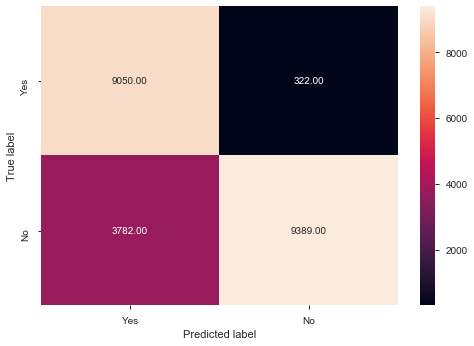

In [78]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [79]:
metrics.roc_auc_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8360549028391847

## Random Forest 

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
pargrid_rf = {'n_estimators': [50,60,70,80,90,100],
                  'max_features': [2,3,4,5,6,7]}



In [86]:
from sklearn.model_selection import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 28.6min finished


In [87]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 80}

In [88]:
gscv_rf.best_score_

0.9976582097608993

In [89]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=80, max_features=5, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [90]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [105]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
#print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.9996824691201219


Text(0.5, 26.0, 'Predicted label')

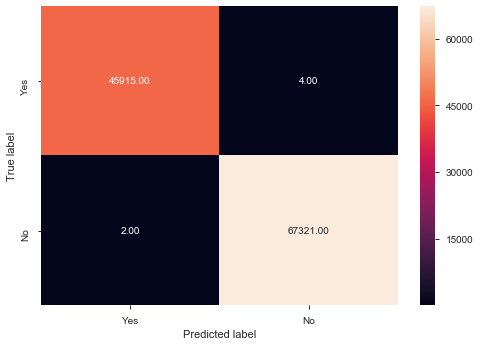

In [92]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sns.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

### Feature importance from the Random Forest Model

In [93]:
print(radm_clf.feature_importances_)
print(np.argsort(radm_clf.feature_importances_))

[0.15661954 0.20310137 0.18670276 0.02923048 0.10985133 0.08006511
 0.02977845 0.00391179 0.00561926 0.09349469 0.05816006 0.00537735
 0.03336415 0.00472367]
[ 7 13 11  8  3  6 12 10  5  9  4  0  2  1]


In [94]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

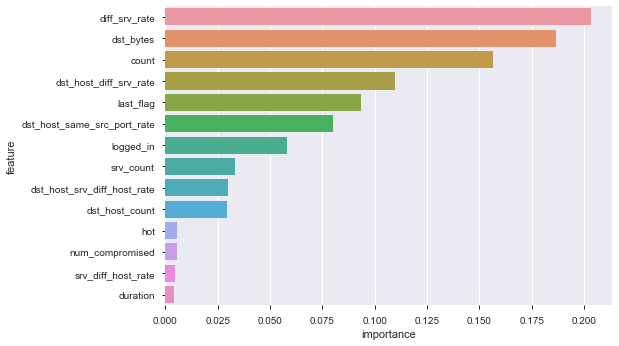

In [95]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

#### Note: As per the model, the most important features which detect anamolies and attacks in the network are:-
diff_srv_rate 

dst_bytes

count

dst_host_diff_srv_rate

last_flag

dst_host_same_src_port_rate

logged_in

srv_count

dst_host_srv_diff_rate

dst_host_count

hot

num_compromised

srv_diff_host_rate

duration

## Naive Bayes Model

In [70]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

### 1. BernoulliNB

In [98]:
bnb_clf = BernoulliNB()
bnb_clf.fit(train_X, train_y)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

Text(0.5, 26.0, 'Predicted label')

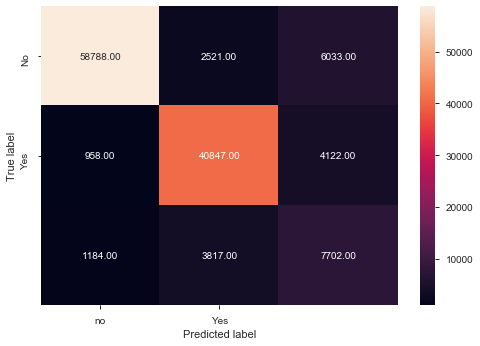

In [99]:
nb_cm = metrics.confusion_matrix( test_y,bnb_clf.predict( test_X) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [101]:
accuracy=metrics.accuracy_score( test_y, bnb_clf.predict( test_X ) )
#AUC=metrics.roc_auc_score( test_y, bnb_clf.predict( test_X ))

print("BernoulliNB model accuracy: %.3f" % (accuracy))
#print("BernoulliNB model AUC: %.3f" % (AUC))

GaussianNB model accuracy: 0.852


### 2. GaussianNB 

In [102]:
gn_clf = GaussianNB()
gn_clf.fit(train_X, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [64]:
nb_cm = metrics.confusion_matrix( test_y,gn_clf.predict( test_X) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'test_y' is not defined

In [104]:
accuracy=metrics.accuracy_score( test_y, gn_clf.predict( test_X ) )
#AUC=metrics.roc_auc_score( test_y, gn_clf.predict( test_X ))

print("GaussianNB model accuracy: %.3f" % (accuracy))
#print("GaussianNB model AUC: %.3f" % (AUC))

GaussianNB model accuracy: 0.840


### 3.MultinomialNB 

In [106]:
mnb_clf = MultinomialNB()
mnb_clf.fit(train_X, train_y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Text(0.5, 26.0, 'Predicted label')

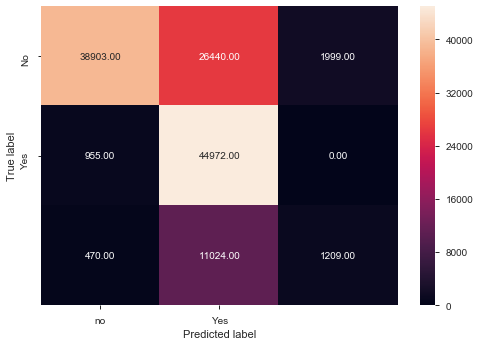

In [107]:
nb_cm = metrics.confusion_matrix( test_y,mnb_clf.predict( test_X) )
sns.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["no", "Yes"] , yticklabels = ["No", "Yes"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [108]:
accuracy=metrics.accuracy_score( test_y, mnb_clf.predict( test_X ) )
#AUC=metrics.roc_auc_score( test_y, mnb_clf.predict( test_X ))

print("MultinomialNB model accuracy: %.3f" % (accuracy))
#print("MultinomialNB model AUC: %.3f" % (AUC))

GaussianNB model accuracy: 0.675


## Neural Network Model

In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(train_X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [110]:
# Now apply the transformations to the data:
train_X = scaler.transform(train_X)
test_X = scaler.transform(test_X)

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(train_X, train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [113]:
predictions = mlp.predict(test_X)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y,predictions))
print(classification_report(test_y,predictions))

[[67157    65   120]
 [  132 45748    47]
 [  102     3 12598]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67342
           1       1.00      1.00      1.00     45927
           2       0.99      0.99      0.99     12703

    accuracy                           1.00    125972
   macro avg       0.99      1.00      0.99    125972
weighted avg       1.00      1.00      1.00    125972



In [114]:
len(mlp.coefs_)
len(mlp.coefs_[0])
len(mlp.intercepts_[0])

30

In [115]:
mlp.coefs_

[array([[-8.67012898e-01,  7.48077532e-01, -2.73794098e-01,
         -8.38433133e-02, -2.14091534e-01,  1.79000326e-01,
         -1.02791296e+00,  4.32282937e-01,  5.13926685e-01,
         -1.51644145e-01,  3.06119569e-01,  1.07029064e-01,
         -6.13390591e-02,  2.82929940e-01,  5.49724031e-01,
         -1.75457241e-01, -1.15409040e-01,  6.58447539e-01,
         -4.41189557e-01,  4.21623660e-01,  1.78896387e-01,
          8.30998338e-01,  2.54590948e-03,  1.69002435e-01,
         -1.08241928e-01,  1.98029412e-01, -4.45189060e-01,
         -6.35456543e-01, -1.54920730e-02,  7.40932900e-01],
        [-9.23935832e-02,  5.34805925e-01, -1.15834584e-01,
          2.59212004e-01, -7.37864088e-01,  3.60784830e-02,
          3.20104022e-01, -1.08856514e-01, -5.68519591e-01,
         -4.39048932e-02,  1.92613047e-01, -3.70222496e-01,
          3.45477125e-01, -1.55763509e+00,  3.80706118e-02,
         -7.00277890e-02,  1.12770005e-01, -1.70952913e-03,
          1.07646827e-01, -2.17391321e-

In [116]:
mlp.score(train_X,train_y)

0.9962769504334297

## Support Vector Machine (SVM)

### 1.LinearSVC

In [117]:
from sklearn.svm import LinearSVC

In [118]:
svm_clf = LinearSVC(random_state=0, tol=1e-5)
svm_clf.fit(train_X,train_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=0, tol=1e-05,
          verbose=0)

In [119]:
print(svm_clf.coef_)

[[ -2.07050319  -0.04289636   0.21087823  -0.21629746  -0.0760965
   -0.17914754  -0.17553465   0.0747812   -0.13586067   0.46187799
    0.61811001  -0.11326773   1.28181928  -0.0732174 ]
 [  0.93347719  -0.26714939  -0.16208789   0.30605193  -0.56023162
   -0.01869756  -0.07226752 -10.73138538   0.01422442  -0.09512706
   -0.58855441   0.2383591   -0.6073807   -0.18620606]
 [  0.14041825   0.1746667   -0.15359882   0.13253099   0.23033167
    0.32006237   0.16687794  -0.06040573   0.14323206  -0.52430872
   -0.35436191  -0.10658607  -0.35127719   0.12205303]]


In [120]:
print(svm_clf.intercept_)

[ 0.00660661 -2.02872283 -1.73786329]


In [121]:
print(svm_clf.predict(train_X))

[2 1 0 ... 0 1 0]


### 2.SVC

In [122]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

model = SVC(kernel='rbf', class_weight='balanced',gamma='scale')

In [123]:
model.fit(train_X,train_y)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [124]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 10],
              'gamma': [0.0001, 0.001]}
grid = GridSearchCV(model, param_grid)

grid.fit(train_X,train_y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight='balanced',
                           coef0=0.0, decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'gamma': [0.0001, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [125]:
print(grid.best_params_)

{'C': 10, 'gamma': 0.001}


In [126]:
model = grid.best_estimator_
yfit = model.predict(test_X)

In [127]:
from sklearn.metrics import classification_report
print(classification_report(test_y, yfit))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97     67342
           1       0.97      0.96      0.97     45927
           2       0.83      0.99      0.90     12703

    accuracy                           0.96    125972
   macro avg       0.93      0.97      0.95    125972
weighted avg       0.97      0.96      0.96    125972



Text(122.21000000000001, 0.5, 'predicted label')

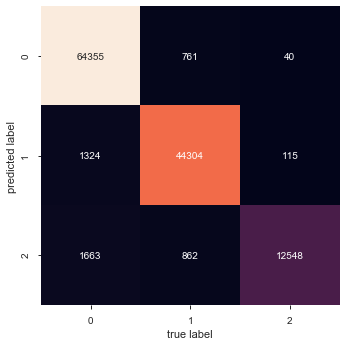

In [128]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test_y, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

## Voting Ensemble
Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

In [129]:
from sklearn.ensemble import VotingClassifier

In [137]:
voting_clf = VotingClassifier(estimators = [('logreg',logreg),('radm_clf',radm_clf), ('clf_tree',clf_tree), 
                                            ('mlp',MLPClassifier()),('svm_clf',SVC())], voting = 'hard')
voting_clf.fit(train_X, train_y)

VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='multinomial',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('radm_clf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     cr...
                                        

In [136]:
print(metrics.accuracy_score(test_y,voting_clf.predict(test_X)))
#print(metrics.roc_auc_score(test_y,voting_clf.predict(test_X)))

0.9983964690566157
